In [1]:
import torch
from ddpm import get_dataset, viz_sample, viz_samples, NoiseScheduler, reconstruct, denoise

In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib widget

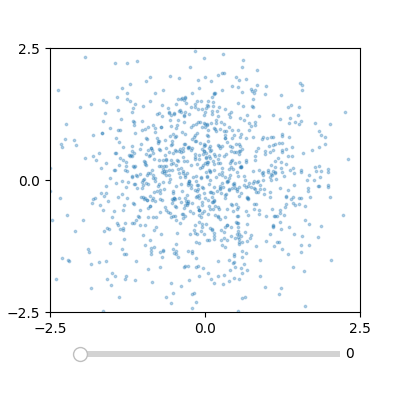

In [4]:
log_dir = "learning_results/2024-03-28_18-49-55"  # set your directory: learning_results/yyyy-mm-dd_hh-mm-ss-xx
eval_data_size = 1000
ns, model = reconstruct(log_dir)
model.eval()
x_last = torch.randn(eval_data_size, 2)
samples = [x_last]
for t in reversed(range(ns.num_timesteps)):
    with torch.no_grad():
        residual = model(samples[-1], t)
    samples.append(ns.remove_noise(samples[-1], residual, t))
viz_samples(samples)

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import imageio

images = []
fig = plt.figure()

def update(frame):
    plt.clf()
    plt.scatter(samples[frame][:, 0], samples[frame][:, 1], s=10)
    plt.xlim(-3, 3)
    plt.ylim(-3, 3)
    plt.title(f'Étape {frame}')
    images.append(f'image_{frame}.png')

ani = FuncAnimation(fig, update, frames=len(samples), interval=200)

with imageio.get_writer('animation.gif', mode='I') as writer:
    for frame in range(len(samples)):
        update(frame)  # Appel explicite de la fonction de mise à jour pour chaque frame
        filename = f'image_{frame}.png'
        plt.savefig(filename)
        writer.append_data(imageio.imread(filename))
        images.append(filename)